# Twitter

In [1]:
# loading libraries
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium import Choropleth
from folium.plugins import HeatMap
from shapely.geometry import Point

import warnings 
warnings.filterwarnings("ignore")

## Tweet's with hash

In [2]:
# load the data
df_hash = pd.read_pickle('data/df_hash.pkl')

### Continents

In [3]:
# unique continents of tweets
df_hash.continent.unique()

array(['North America', 'Continent_NA', 'Europe', 'Asia', 'Africa',
       'Oceania', 'South America', 'Antarctica'], dtype=object)

In [4]:
# breakdown of tweets by continent
df_temp = pd.DataFrame()
for cont in df_hash.continent.unique():
    df_temp = pd.concat([df_temp, df_hash[df_hash.continent == cont].continent.value_counts()])

In [5]:
# sort values
df_temp.sort_values(by=0,ascending=False,inplace=True)

In [6]:
# def my_fmt(x):
#     return '{:1.1f}%\n({:.0f})'.format(x, total*x/100)

In [7]:
# sizes = df_temp[0].values

In [8]:
# labels = df_temp.index
# explode = (0, 0, 0, 0,0,0,0,0)
# total = sum(sizes)
# fig1, ax1 = plt.subplots(figsize=(10,10))
# fig1.set_facecolor("w")
# ax1.pie(sizes, explode=explode, labels=labels, autopct=my_fmt, shadow=False, startangle=0)

# ax1.axis('equal')
# ax1.set_title('Liczba tweetów opublikowanych na poszczególnych kontynentach')
# plt.show()

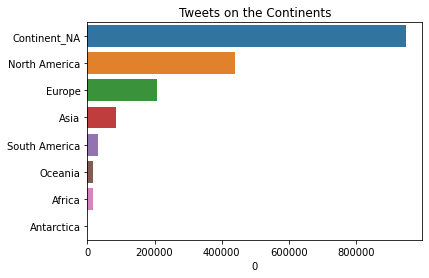

In [9]:
# barplot of the most tweets
plt.title('Tweets on the Continents')
sns.barplot(data = df_temp, x = df_temp[0], y = df_temp.index);

In [10]:
df_hash.continent.value_counts()

Continent_NA     950287
North America    440489
Europe           207292
Asia              86243
South America     30190
Oceania           16641
Africa            15143
Antarctica           17
Name: continent, dtype: int64

In [11]:
# tweets by continents
Na_df = df_hash[df_hash.continent == 'Continent_NA']
America_df = df_hash[df_hash.continent == 'North America']
Europe_df = df_hash[df_hash.continent == 'Europe']
Asia_df = df_hash[df_hash.continent == 'Asia']
USA_df = df_hash[df_hash.country == 'United States']

Na_df.to_pickle('data/Na_df.pkl')
America_df.to_pickle('data/America_df.pkl')
Europe_df.to_pickle('data/Europe_df.pkl')
Asia_df.to_pickle('data/Asia_df.pkl')
USA_df.to_pickle('data/USA_df.pkl')

## Asia

In [12]:
# countries of tweets in Asia
Asia_df.country.unique()

array(['China', 'Georgia', 'Mongolia', 'Vietnam', 'Singapore', 'Malaysia',
       'Japan', 'South Korea', 'Turkey', 'India', 'Indonesia',
       'United Arab Emirates', 'Iran', 'Saudi Arabia', 'Afghanistan',
       'Iraq', 'Taiwan', 'Philippines', 'Bangladesh', 'Cambodia',
       'Pakistan', 'Lebanon', 'Azerbaijan', 'Russia', 'Hong Kong',
       'Cyprus', 'Bahrain', 'Israel', 'Nepal', 'Armenia', 'Egypt',
       'Australia', 'Qatar', 'Thailand', 'Maldives', 'Myanmar',
       'Sri Lanka', 'Palestinian Territory', 'Yemen', 'Jordan', 'Kuwait',
       'Kazakhstan', 'North Korea', 'Laos', 'Syria', 'Oman', 'Uzbekistan',
       'Tajikistan', 'East Timor'], dtype=object)

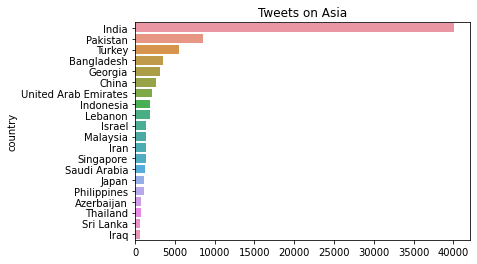

In [13]:
# 20 countries in Asia
Asia_s = Asia_df.groupby(by = 'country')['tweet'].count().sort_values(ascending = False)
y = Asia_s[:20].index
x = Asia_s[:20].values
plt.title('Tweets on Asia')
sns.barplot(data = Asia_df, x = x, y = y);

## Europe

In [14]:
# countries of tweets in Europe
Europe_df.country.unique()

array(['United Kingdom', 'Poland', 'Spain', 'Russia', 'Jersey', 'Greece',
       'Germany', 'Netherlands', 'The Netherlands', 'Switzerland',
       'Austria', 'Sweden', 'Slovenia', 'Albania', 'Italy', 'France',
       'Finland', 'Slovakia', 'Luxembourg', 'Portugal',
       'Bosnia and Herzegovina', 'Belgium', 'Denmark', 'Norway',
       'Czech Republic', 'Ireland', 'Turkey', 'Hungary', 'Estonia',
       'Latvia', 'Serbia', 'Kosovo', 'Iceland', 'Malta', 'Gibraltar',
       'Bulgaria', 'Ukraine', 'Monaco', 'Liechtenstein', 'Isle of Man',
       'Montenegro', 'Romania', 'Moldova', 'Lithuania', 'North Macedonia',
       'Vatican City', 'Faroe Islands', 'Croatia', 'Belarus',
       'Country_NA'], dtype=object)

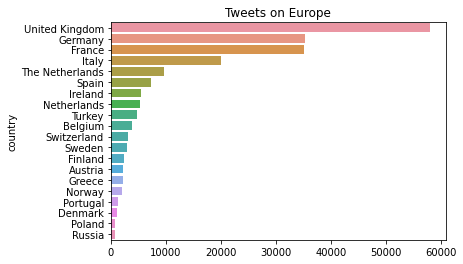

In [15]:
# 20 countries in Europe
Europe_s = Europe_df.groupby(by = 'country')['tweet'].count().sort_values(ascending = False)
yE = Europe_s[:20].index
xE = Europe_s[:20].values
plt.title('Tweets on Europe')
sns.barplot(x = xE, y = yE);

In [16]:
Europe_s[:20]

country
United Kingdom     57984
Germany            35362
France             35100
Italy              20070
The Netherlands     9567
Spain               7223
Ireland             5448
Netherlands         5271
Turkey              4777
Belgium             3817
Switzerland         3046
Sweden              2980
Finland             2373
Austria             2151
Greece              2119
Norway              2035
Portugal            1263
Denmark             1015
Poland               696
Russia               655
Name: tweet, dtype: int64

## America

In [17]:
# countries in America
America_df.country.unique()

array(['United States', 'Mexico', 'Canada', 'Costa Rica', 'Panama',
       'Cuba', 'El Salvador', 'Guatemala', 'Dominican Republic', 'France',
       'Barbados', 'Haiti', 'Honduras', 'Nicaragua', 'Bahamas',
       'Cayman Islands', 'Saint Kitts and Nevis', 'Jamaika',
       'The Bahamas', 'Grenada', 'Trinidad and Tobago',
       'British Virgin Islands', 'Anguilla', 'The Netherlands',
       'Antigua and Barbuda', 'Greenland', 'Belize', 'Saint Lucia',
       'Dominica', 'Puerto Rico', 'Turks and Caicos Islands',
       'Country_NA'], dtype=object)

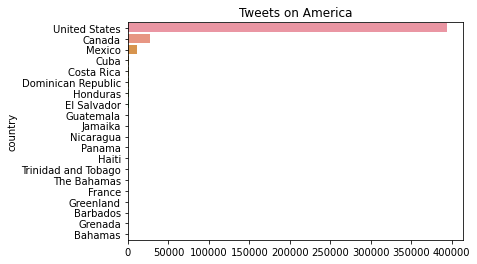

In [18]:
America_s = America_df.groupby(by='country')['tweet'].count().sort_values(ascending = False)
yAm = America_s[:20].index
xAm = America_s[:20].values
plt.title('Tweets on America')
sns.barplot(x = xAm, y = yAm);

In [19]:
America_s[:20]

country
United States          394156
Canada                  27790
Mexico                  10890
Cuba                     1436
Costa Rica               1233
Dominican Republic       1139
Honduras                  803
El Salvador               698
Guatemala                 657
Jamaika                   348
Nicaragua                 343
Panama                    237
Haiti                     230
Trinidad and Tobago       133
The Bahamas                80
France                     75
Greenland                  52
Barbados                   42
Grenada                    31
Bahamas                    31
Name: tweet, dtype: int64

## United States

In [20]:
USA_df.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'source', 'user_id',
       'user_name', 'user_screen_name', 'user_description', 'user_join_date',
       'user_followers_count', 'user_location', 'lat', 'long', 'city',
       'country', 'continent', 'state', 'state_code', 'hash', 'day_of_week',
       'day_name', 'hour', 'day', 'month', 'month_name'],
      dtype='object')

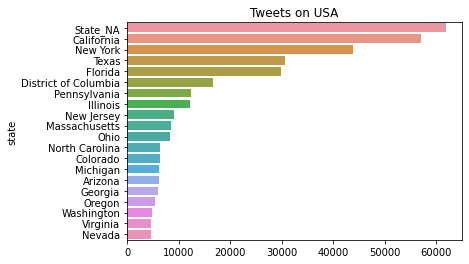

In [21]:
# states in USA
USA_s = USA_df.groupby(by = 'state')['tweet'].count().sort_values(ascending = False)
yUS = USA_s[:20].index
xUS = USA_s[:20].values
plt.title('Tweets on USA')
sns.barplot(x = xUS, y = yUS);

In [22]:
USA_s[:20]

state
State_NA                61892
California              56936
New York                43861
Texas                   30663
Florida                 29826
District of Columbia    16733
Pennsylvania            12406
Illinois                12270
New Jersey               8995
Massachusetts            8457
Ohio                     8273
North Carolina           6450
Colorado                 6299
Michigan                 6125
Arizona                  6113
Georgia                  6059
Oregon                   5376
Washington               4867
Virginia                 4711
Nevada                   4617
Name: tweet, dtype: int64

In [23]:
# all states in data
USA_df.state.unique()

array(['Florida', 'Montana', 'California', 'Illinois', 'Kentucky',
       'State_NA', 'New York', 'Minnesota', 'Massachusetts', 'Virginia',
       'Indiana', 'South Carolina', 'Arkansas', 'Washington', 'Georgia',
       'Texas', 'Ohio', 'Arizona', 'Maryland', 'New Jersey',
       'Pennsylvania', 'North Carolina', 'Louisiana', 'Utah', 'Missouri',
       'Tennessee', 'Wyoming', 'Oregon', 'District of Columbia',
       'Oklahoma', 'New Mexico', 'Michigan', 'Nebraska', 'Nevada',
       'Alabama', 'West Virginia', 'Colorado', 'Idaho', 'Wisconsin',
       'North Dakota', 'Connecticut', 'Kansas', 'Iowa', 'New Hampshire',
       'Delaware', 'Maine', 'Hawaii', 'Alaska', 'Vermont', 'Puerto Rico',
       'Mississippi', 'Rhode Island', 'Northern Mariana Islands', 'Guam',
       'South Dakota'], dtype=object)

In [24]:
# create map for USA
poly = gpd.read_file('data/usa_shape/tl_2014_us_state.shp', SHAPE_RESTORE_SHX = 'YES')

geo_data=poly[['NAME', 'geometry']].set_index('NAME').__geo_interface__

In [25]:
# map 
# USA_tweet = folium.Map(location = [35.32, -81.0589], tiles = 'cartodbpositron', zoom_start = 3)
# Choropleth(geo_data = geo_data, 
#            data = USA_s,
#            bins = 9,
#            key_on = "feature.id", 
#            fill_color = 'YlGnBu', 
#            legend_name = "Number of tweets"
#           ).add_to(USA_tweet)
# USA_tweet

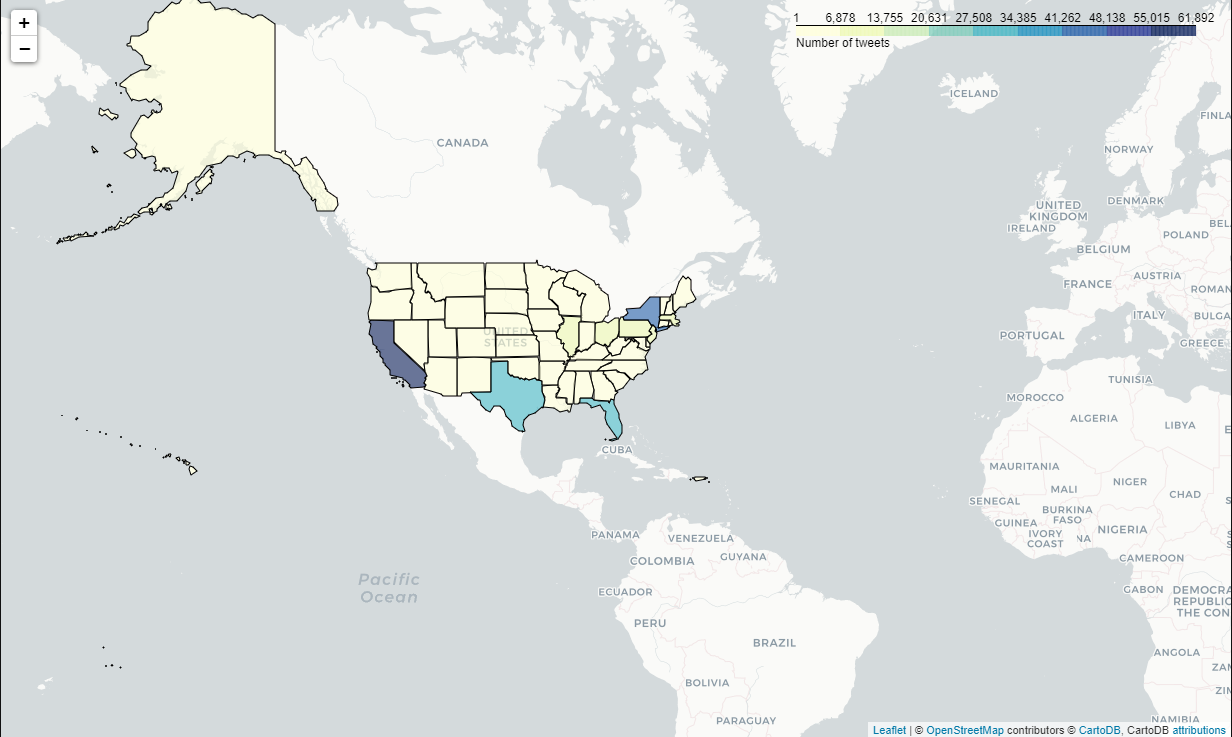

In [26]:
# the map generates a large file, so I will load the prepared photo
from IPython.display import Image
Image('graph/map_USA.png')

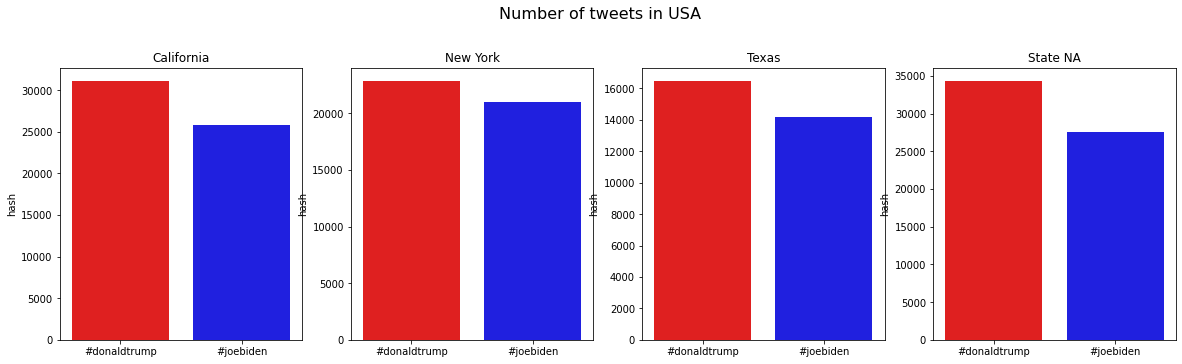

In [27]:
# barplots with hastags
x = ['#donaldtrump', '#joebiden']
fig, axes = plt.subplots(1, 4, sharex = True, figsize = (20,5))
fig.suptitle('Number of tweets in USA', fontsize = 16, y = 1.05)
sns.barplot(ax = axes[0], x = x, y = USA_df[USA_df.state == 'California'].groupby('hash')['hash'].count(), palette = ['red', 'blue'])
axes[0].set_title('California')
sns.barplot(ax = axes[1], x = x, y = USA_df[USA_df.state == 'New York'].groupby('hash')['hash'].count(), palette = ['red', 'blue'])
axes[1].set_title('New York')
sns.barplot(ax=axes[2], x = x, y = USA_df[USA_df.state == 'Texas'].groupby('hash')['hash'].count(), palette = ['red', 'blue'])
axes[2].set_title('Texas')
sns.barplot(ax=axes[3], x = x, y = USA_df[USA_df.state == 'Florida'].groupby('hash')['hash'].count(), palette = ['red', 'blue'])
axes[3].set_title('Florida')
sns.barplot(ax=axes[3], x = x, y = USA_df[USA_df.state == 'State_NA'].groupby('hash')['hash'].count(), palette = ['red', 'blue'])
axes[3].set_title('State NA');